<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-following-command-overwrites-Base.show-so-that-all-numbers-only-print-to-their-low-precision-(around-3-digits)." data-toc-modified-id="The-following-command-overwrites-Base.show-so-that-all-numbers-only-print-to-their-low-precision-(around-3-digits).-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The following command overwrites Base.show so that all numbers only print to their low precision (around 3 digits).</a></span></li><li><span><a href="#A-random-graph" data-toc-modified-id="A-random-graph-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>A random graph</a></span></li><li><span><a href="#A-useful-eigenvector" data-toc-modified-id="A-useful-eigenvector-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>A useful eigenvector</a></span></li><li><span><a href="#Cospectral-graphs" data-toc-modified-id="Cospectral-graphs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cospectral graphs</a></span></li><li><span><a href="#The-motivating-graph" data-toc-modified-id="The-motivating-graph-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>The motivating graph</a></span></li></ul></div>

In [1]:
using LinearAlgebra
using Statistics
using Plots
using SparseArrays
using FileIO
using JLD2
using Random
using Arpack
using Laplacians
using PyPlot

# The following command overwrites Base.show so that all numbers only print to their low precision (around 3 digits).

In [2]:
function Base.show(io::IO, x::Union{Float64,Float32})
                 Base.Grisu._show(io, round(x, sigdigits=3), Base.Grisu.SHORTEST, 0, get(io, :typeinfo, Any) !== typeof(x), false)
         end  

# A random graph

In [3]:
Random.seed!(1)
M = triu(rand(5,5),1)
M = M + M'

5×5 Array{Float64,2}:
 0.0    0.211  0.556   0.209   0.077
 0.211  0.0    0.437   0.251   0.64 
 0.556  0.437  0.0     0.0204  0.874
 0.209  0.251  0.0204  0.0     0.279
 0.077  0.64   0.874   0.279   0.0  

In [4]:
eigvals(M)

5-element Array{Float64,1}:
 -1.07   
 -0.487  
 -0.0104 
  0.00268
  1.56   

In [5]:
p = randperm(5)
Mp = M[p,p]

5×5 Array{Float64,2}:
 0.0    0.64   0.211  0.251   0.437 
 0.64   0.0    0.077  0.279   0.874 
 0.211  0.077  0.0    0.209   0.556 
 0.251  0.279  0.209  0.0     0.0204
 0.437  0.874  0.556  0.0204  0.0   

In [6]:
eigvals(Mp)

5-element Array{Float64,1}:
 -1.07   
 -0.487  
 -0.0104 
  0.00268
  1.56   

In [7]:
P = zeros(5,5)
for i in 1:5
    P[i,p[i]] = 1
end
P*M*P' - Mp

5×5 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

# A useful eigenvector

In [8]:
eig1 = eigen(M)
eig2 = eigen(Mp)
eig1

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
5-element Array{Float64,1}:
 -1.07   
 -0.487  
 -0.0104 
  0.00268
  1.56   
eigenvectors:
5×5 Array{Float64,2}:
  0.354  -0.201   0.812     0.267   -0.32 
 -0.144  -0.807  -0.247    -0.224   -0.466
 -0.643   0.324   0.00455   0.409   -0.561
 -0.189   0.292   0.343    -0.843   -0.225
  0.636   0.344  -0.402    -0.0374  -0.561

In [9]:
eig2.vectors[:,1]

5-element Array{Float64,1}:
  0.144
 -0.636
 -0.354
  0.189
  0.643

In [10]:
p1 = sortperm(-eig1.vectors[:,1])
p2 = sortperm(eig2.vectors[:,1])
[eig1.vectors[p1,1] eig2.vectors[p2,1]]

5×2 Array{Float64,2}:
  0.636  -0.636
  0.354  -0.354
 -0.144   0.144
 -0.189   0.189
 -0.643   0.643

In [11]:
p1[invperm(p2)]

5-element Array{Int64,1}:
 2
 5
 1
 4
 3

In [12]:
p

5-element Array{Int64,1}:
 2
 5
 1
 4
 3

# Cospectral graphs

In [13]:
edges = [
    1 2;
    2 3;
    3 4;
    1 4;
    3 5;
    5 6;
    3 6
]
fish = Matrix(sparse(edges[:,1],edges[:,2],1,6,6))
fish = fish + fish'

6×6 Array{Int64,2}:
 0  1  0  1  0  0
 1  0  1  0  0  0
 0  1  0  1  1  1
 1  0  1  0  0  0
 0  0  1  0  0  1
 0  0  1  0  1  0

In [14]:
edges = [
    1 2;
    2 3;
    3 4;
    1 4;
    2 5;
    5 4;
    3 6
]
fish2 = Matrix(sparse(edges[:,1],edges[:,2],1,6,6))
fish2 = fish2 + fish2'

6×6 Array{Int64,2}:
 0  1  0  1  0  0
 1  0  1  0  1  0
 0  1  0  1  0  1
 1  0  1  0  1  0
 0  1  0  1  0  0
 0  0  1  0  0  0

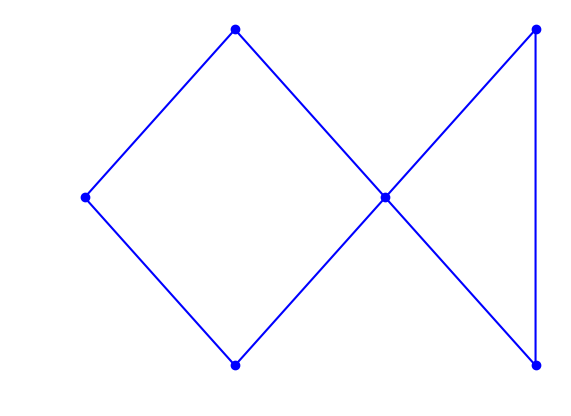

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1437c6e48>

In [15]:
x1 = [0; 1; 2; 1; 3; 3]
y1 = [0; 1; 0; -1; 1; -1]
plot_graph(sparse(fish),x1,y1)

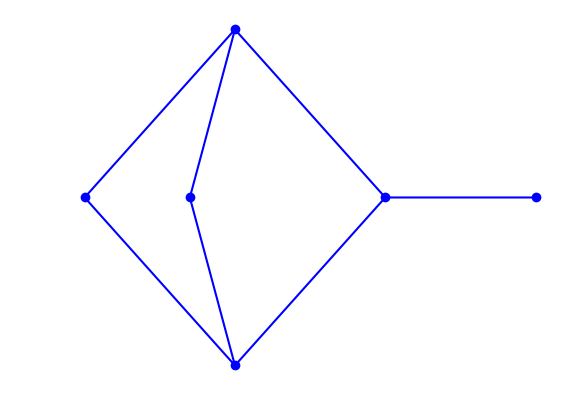

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14381b898>

In [16]:
x1 = [0; 1; 2; 1; 0.7; 3]
y1 = [0; 1; 0; -1; 0; 0]
plot_graph(sparse(fish2),x1,y1)

In [17]:
eigvals(lap(fish))

6-element Array{Float64,1}:
 -2.14e-16
  0.764   
  2.0     
  3.0     
  3.0     
  5.24    

In [18]:
eigvals(lap(fish2))

6-element Array{Float64,1}:
 -5.65e-16
  0.764   
  2.0     
  3.0     
  3.0     
  5.24    

# The motivating graph

In [19]:
edges = [
    1 2;
    2 3;
    3 4;
    1 4;
    5 6;
    6 7;
    1 5;
    2 5;
    3 7;
    4 7;
    6 8
]

11×2 Array{Int64,2}:
 1  2
 2  3
 3  4
 1  4
 5  6
 6  7
 1  5
 2  5
 3  7
 4  7
 6  8

In [20]:
M = sparse(edges[:,1],edges[:,2],1,8,8)
M = M + M';
M = Matrix(M)

8×8 Array{Int64,2}:
 0  1  0  1  1  0  0  0
 1  0  1  0  1  0  0  0
 0  1  0  1  0  0  1  0
 1  0  1  0  0  0  1  0
 1  1  0  0  0  1  0  0
 0  0  0  0  1  0  1  1
 0  0  1  1  0  1  0  0
 0  0  0  0  0  1  0  0

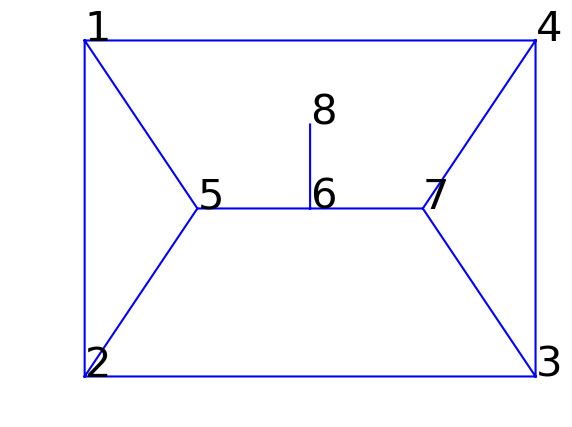

In [21]:
x = [-2; -2; 2; 2; -1; 0; 1; 0]
y = [1; -1; -1; 1; 0 ; 0; 0; 0.5]
plot_graph(sparse(M),x,y,dots=false)
for i in 1:8
    PyPlot.annotate(i, xy = [x[i]; y[i]], fontsize=30.0)
end

In [22]:
L = lap(M)

8×8 Array{Float64,2}:
  3.0  -1.0   0.0  -1.0  -1.0   0.0   0.0   0.0
 -1.0   3.0  -1.0   0.0  -1.0   0.0   0.0   0.0
  0.0  -1.0   3.0  -1.0   0.0   0.0  -1.0   0.0
 -1.0   0.0  -1.0   3.0   0.0   0.0  -1.0   0.0
 -1.0  -1.0   0.0   0.0   3.0  -1.0   0.0   0.0
  0.0   0.0   0.0   0.0  -1.0   3.0  -1.0  -1.0
  0.0   0.0  -1.0  -1.0   0.0  -1.0   3.0   0.0
  0.0   0.0   0.0   0.0   0.0  -1.0   0.0   1.0

In [23]:
eigvals(L)

8-element Array{Float64,1}:
 2.06e-16
 0.657   
 1.59    
 2.53    
 3.0     
 4.41    
 4.81    
 5.0     

In [27]:
V = round.(eigen(L).vectors,digits=3)

8×8 Array{Float64,2}:
 0.354  -0.237   0.354  -0.228   0.5   0.354   0.13    0.5
 0.354  -0.237   0.354  -0.228  -0.5   0.354   0.13   -0.5
 0.354  -0.237  -0.354  -0.228  -0.5  -0.354   0.13    0.5
 0.354  -0.237  -0.354  -0.228   0.5  -0.354   0.13   -0.5
 0.354  -0.081   0.5     0.349  -0.0  -0.5    -0.497  -0.0
 0.354   0.283  -0.0     0.62    0.0  -0.0     0.64    0.0
 0.354  -0.081  -0.5     0.349   0.0   0.5    -0.497   0.0
 0.354   0.826   0.0    -0.405   0.0   0.0    -0.168  -0.0

In [28]:
p1 = [2; 1; 4; 3; 5; 6; 7; 8]
V[p1,:] ./ V

8×8 Array{Float64,2}:
 1.0  1.0    1.0  1.0   -1.0    1.0  1.0   -1.0
 1.0  1.0    1.0  1.0   -1.0    1.0  1.0   -1.0
 1.0  1.0    1.0  1.0   -1.0    1.0  1.0   -1.0
 1.0  1.0    1.0  1.0   -1.0    1.0  1.0   -1.0
 1.0  1.0    1.0  1.0  NaN      1.0  1.0  NaN  
 1.0  1.0  NaN    1.0  NaN    NaN    1.0  NaN  
 1.0  1.0    1.0  1.0  NaN      1.0  1.0  NaN  
 1.0  1.0  NaN    1.0  NaN    NaN    1.0  NaN  

In [29]:
p2 = [4; 3; 2; 1; 7; 6; 5; 8]
V[p2,:] ./ V

8×8 Array{Float64,2}:
 1.0  1.0   -1.0  1.0    1.0   -1.0  1.0   -1.0
 1.0  1.0   -1.0  1.0    1.0   -1.0  1.0   -1.0
 1.0  1.0   -1.0  1.0    1.0   -1.0  1.0   -1.0
 1.0  1.0   -1.0  1.0    1.0   -1.0  1.0   -1.0
 1.0  1.0   -1.0  1.0  NaN     -1.0  1.0  NaN  
 1.0  1.0  NaN    1.0  NaN    NaN    1.0  NaN  
 1.0  1.0   -1.0  1.0  NaN     -1.0  1.0  NaN  
 1.0  1.0  NaN    1.0  NaN    NaN    1.0  NaN  